# Question 4

## Self organizing map (SOM)

Self Organizing Map (SOM) is a kind of artificial neural network which is used for dimensionality reduction as it is primarily trained in unsupervised learning to generate a lower dimension representation of input samples.
They use competitive learning as compared to other ANN which use error correction techniques like backpropagation via gradient descent.

Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data generation with 24 colour shades

In [2]:
# initializing 24 colour codes and their names 

colours_codes = np.array([[128,0,0],[220,20,60],[255,0,0],[205,92,92],[0,100,0],[152,251,152],[0,128,0],[127,255,0],
         [30,144,255],[0,0,139],[65,105,225],[135,206,250],[218,165,32],[255,255,0],[255,165,0],[240,230,140],[0,139,139],
         [0,139,139],[0,128,128],[175,238,238],[255,20,147],[255,0,255],[238,130,238],[255,182,193]])

colour_names = ['maroon', 'crimson', 'red', 'indian red','dark green','pale green','green','chartreuse'
         'dodger blue', 'dark blue', 'royal blue', 'light sky blue','golden rod','yellow','orange','khaki'
         'dark cyan', 'dark slate gray', 'teal', 'pale turquoise','deep pink', 'magenta / fuchsia', 'violet','light pink']

# to convert colour code values between 0 and 1 , normalizing them
colours_codes=colours_codes/255

### Forming grid

Output array with dimensions 10000*2.

In [3]:
# initializing mapping grid
grid_map = 100

# initializing grid for output of size 100 by 100 

output = np.zeros((grid_map*grid_map,2))
k = 0

for i in range(grid_map):
    for j in range(grid_map):
        output[k,:] = [i,j]
        k = k+1

## function for Distance calculation

In [4]:
# function for distance calculation ( euclidian distance)
def euc_dist(x, weights):
    return np.linalg.norm(x-weights, axis=-1)

## Functions for winner nodes and weight updation

In [5]:
# function to find winner nodes
def winner_calc(x,weights):
    distance = euc_dist(x,weights) 
    winning_index = distance.argmin()
    return winning_index

# updating weight of winner node calcuated through function above and their neighboring nodes
def update_weight(learn_rate,sigma,x,weight):
    winning_index = winner_calc(x,weight)   
    a = np.floor(winning_index/grid_map)
    b = np.mod(winning_index,grid_map)
    distance = euc_dist(np.array([a, b]), output)
    nij = np.exp(-1*(distance**2)/(2 * sigma**2)).reshape(-1,1)
    weight = weight + learn_rate * nij * (x - weight)   
    return weight

## Function for learning rate and sigma decay

In [6]:
# initializing functions for the learning rate and sigma change

def learn_rate_decay(k,epoch,lr_initial):
    return lr_initial* np.exp(-k/epoch)

def sigma_decay(k,epoch,sigma_initial):
    return sigma_initial*np.exp(-k/epoch)

## Initializing and radomizing weights

Initializing weight dimensions as 100*100 by 3 (10000, 3) because the mapping of colours is over a grid formed of 100*100 neurons and as there are 3 values with each values corresponding to one of RGB .

In [7]:
# initiazlizing empty wight array

weight = np.empty([grid_map*grid_map,3]) 
print(weight.shape)

(10000, 3)


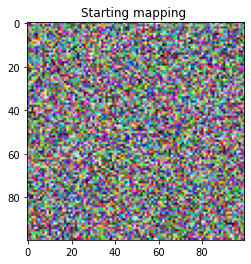

In [8]:
# randomizing the initialzed weights and displaying the initial cinfiguration
for i in range(0,grid_map*grid_map):
    for j in (0,1,2):
        weight[i][j] = np.random.randint(0,256)/255


plt.title("Starting mapping ")
plt.imshow(weight.reshape(grid_map,grid_map,3))
plt.show()

## Varying Sigma Values

In [9]:
# function to initialize different sigma values ( 20,40,100,1000)

def variable_sigmas(sigma, weight,epoch,learn):
    for x in range(0,epoch):
        for i in range(0,24):
            weight = update_weight(learn,sigma,colours_codes[i],weight)
        learn = learn_rate_decay(x,epoch,learn)
        sigma = sigma_decay(x,epoch,sigma)
    
        if(x==19):
            ep_20 = weight.copy()
        if(x==39):
            ep_40 = weight.copy()
        if(x==99):
            ep_100 = weight.copy()
        if(x==999):
            ep_1000 = weight.copy()
  
    return ep_20, ep_40, ep_100, ep_1000


## Plotting sigma and epoch graph

In [10]:
# function for the sigma-epoch graph
def plot_som_epoch(ep_20, ep_40, ep_100, ep_1000):
    ep_20 = ep_20.reshape(100,100,3)
    ep_40 = ep_40.reshape(100,100,3)
    ep_100 = ep_100.reshape(100,100,3)
    ep_1000 = ep_1000.reshape(100,100,3)

    plt.figure(figsize=(8, 8))

    plt.subplot(221)
    plt.title('State at Epoch-20')
    plt.imshow(ep_20)

    plt.subplot(222)
    plt.title('State at Epoch-40')
    plt.imshow(ep_40)

    plt.subplot(223)
    plt.title('State at Epoch-100')
    plt.imshow(ep_100)

    plt.subplot(224)
    plt.title('State at Epoch-1000')
    plt.imshow(ep_1000)

In [11]:
# function to pass different sigma parameter and plotting the results

In [12]:
def plotter (sigma_val, epochs, learning_rate= 0.8):
    sigma = sigma_val
    weights = weight
    # No. of Epochs
    epoch = epochs
    # Learning rate (Default 0.8 specified)
    learn = learning_rate
    ep20, ep40, ep100, ep1000 = variable_sigmas(sigma, weights, epoch, learn)
    plot_som_epoch(ep20, ep40, ep100, ep1000)

# Initializing function with different sigma values

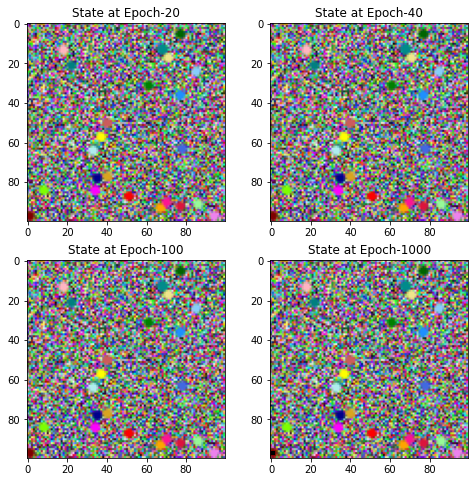

In [13]:
plotter(1,1000, 0.8)

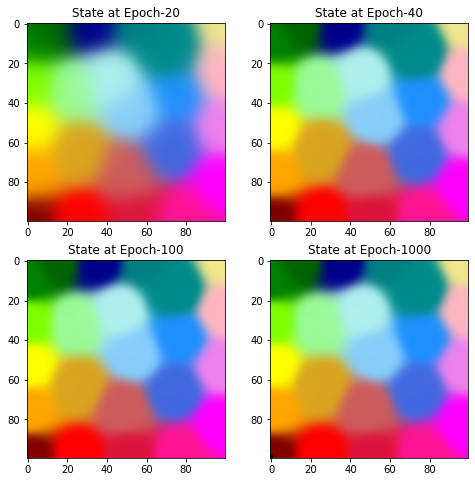

In [14]:
plotter(10,1000)

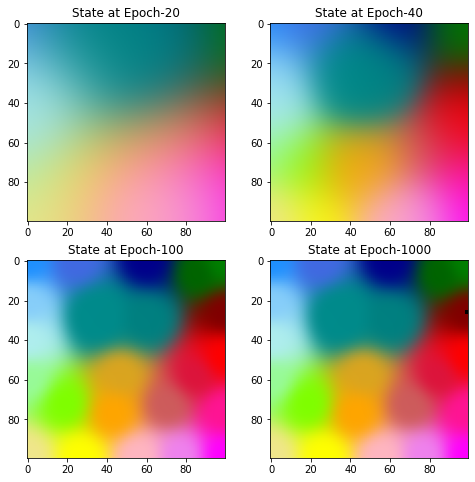

In [15]:
plotter(30,1000)

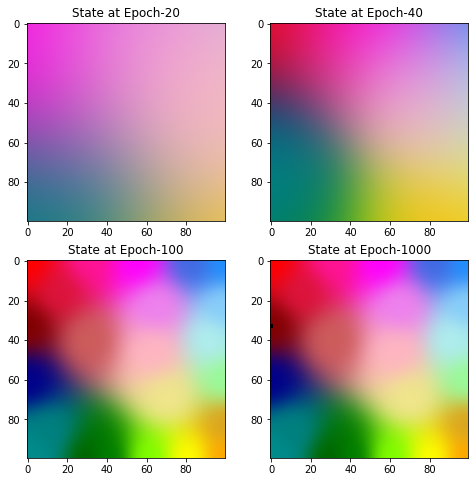

In [16]:
plotter(50,1000)

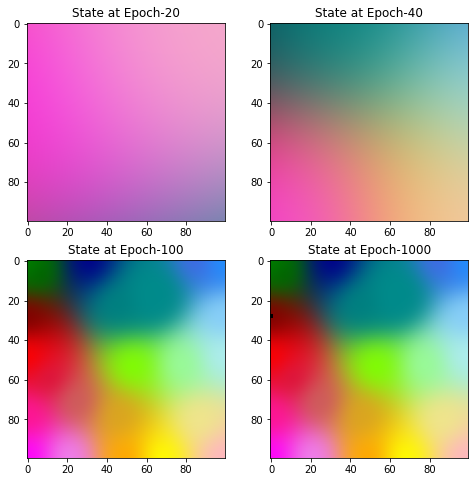

In [17]:
plotter(70,1000)

## Testing

Please call function som_sigma() with sigma-value, weights, Number of epochs, and learning rate of your choice. Uncomment the following block of code -

In [ ]:
#sigma_x = a # Replace sigma value a here
weights_x = weight # change weights if needed here
T_x = 1000 # Epochs
lr_x = 0.8 # Learning rate

w_20_x, w_40_x, w_100_x, w_1000_x = variable_sigmas(sigma_x, weights_x, T_x, lr_x)
plot_epochs( w_20_x, w_40_x, w_100_x, w_1000_x)

We can trst different parameters like sigma and learning rate as well as epichs by changing the parameters sent to the plotter function for example if we want learning rate as 0.5 and sigma 35 then the function for these paramters would be the code commented below- 

In [19]:
# plotter(sigm = 1, learn rate = 0.5, epoch = 35)

In [20]:
# similar to this example changing parameters will yield results according to the paramters specified easily

# Result analysis

The neuron weights are updated according to their closeness to the neurons which most likely resemble the input sample and are referred to as "winning neurons". This gives rise to neurons which are similar to each other forming a cluster after the process is repeated a number of times. This results in decreasing number of clusters as time goes on, as the weights get updated ( according to formula nij in the wpdate weights function ) and the impact of winning nodes placed away from them decreases

The initial images indicate a scattered potrayal of colours. As the SOM progresses identical inputs will group together and this will result in the output having lesser colours as a result 

When the sigma value is lower like 1, larger number of lcusters are formed due to updation of weights of smaller number of neighbboring neurons and for smaller sigma values, the increasing number of epochs results in only a slight change in the image

It is observed that increasing the sigma value results in formation of clusters with colours being overlapped. This is due to wieght updation of more number of neurons around the "winning" neuron. For sigma value like 10 disticnt color clusters can be observed which mesh together as sigma value increases.

Regarding the trend of increasing number of epochs - as the number of epochs increase, the grouping of clusters is more focused with identical inputs being mapped to similar bretheren resulting in more dictinct colour clusters being formed. Additionally, an increase in cluster size is also observed.

